In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Sex=pd.get_dummies(data['Sex'],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [6]:
Embarked=pd.get_dummies(data['Embarked'],drop_first=True)
Embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [7]:
Pclass=pd.get_dummies(data['Pclass'],drop_first=True)
Pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [8]:
data=pd.concat([data,Sex,Embarked,Pclass],axis=1)

In [9]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [10]:
data.drop(['Sex','Embarked','Name','Cabin','Ticket'],axis=1,inplace=True)

In [11]:
data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


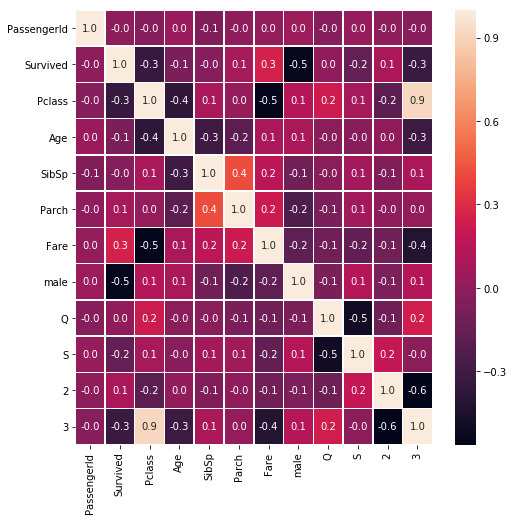

In [12]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
Embarked=pd.get_dummies(test['Embarked'],drop_first=True)
Pclass=pd.get_dummies(test['Pclass'],drop_first=True)
Sex=pd.get_dummies(test['Sex'],drop_first=True)

In [15]:
test=pd.concat([test,Sex,Embarked,Pclass],axis=1)

In [16]:
test.drop(['Sex','Embarked','Name','Cabin','Ticket',],axis=1,inplace=True)
test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,1


In [17]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [18]:
X_train = data.drop("Survived",axis=1)
print(X_train.head())
y_train = data["Survived"]
print(y_train.head())
X_test = test
print(X_test.head())
y_test = pd.read_csv('gender_submission.csv')
y_test=y_test["Survived"]
print(y_test.head())


   PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
0            1       3  22.0      1      0   7.2500     1  0  1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1  0  1
3            4       1  35.0      1      0  53.1000     0  0  1  0  0
4            5       3  35.0      0      0   8.0500     1  0  1  0  1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
0          892       3  34.5      0      0   7.8292     1  1  0  0  1
1          893       3  47.0      1      0   7.0000     0  0  1  0  1
2          894       2  62.0      0      0   9.6875     1  1  0  1  0
3          895       3  27.0      0      0   8.6625     1  0  1  0  1
4          896       3  22.0      1      1  12.2875     0  0  1  0  1
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


In [22]:
from xgboost import XGBClassifier
my_model = XGBClassifier()
my_model.fit(X_train,y_train, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [26]:
predictions = my_model.predict(X_test)

In [27]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
from sklearn.metrics import accuracy_score

prediction = [round(value) for value in predictions]
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 85.17%


In [29]:
final_data = pd.DataFrame()
final_data['PassengerId'] = test['PassengerId']
final_data['Survived'] = predictions

In [31]:
final_data.to_csv(r'submission.csv',index=False)